<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Tarea%20m%C3%ADnimos%20cuadrados/9.4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
import scipy.optimize as spo
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
os.chdir('/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo')
!ls


MinimosLineal.txt  Sesión.ipynb  Untitled0.ipynb


In [7]:
file = '/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo/MinimosLineal.txt'
file

'/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo/MinimosLineal.txt'

In [8]:
data = pd.read_csv(file, sep=' ')
data.columns = ['x', 'y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.abs(np.random.normal(1,2,len(x)))

Text(0, 0.5, 'y')

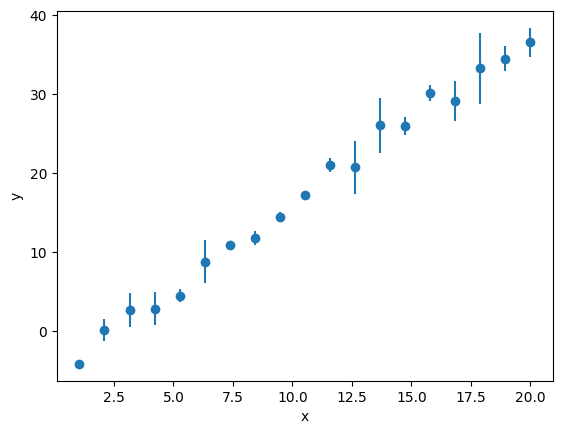

In [9]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [19]:
def modelo(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n
  return y

def chi1(p,x,y,sigma,Model):
  return np.sum(((y-modelo(x,p))/sigma)**2)
nll = lambda *p: chi1(*p)

p0 = np.ones(2)
result = spo.minimize(nll,p0,args=(x,y,sigma,modelo), options={"disp":True})
param = result.x
t = np.linspace(min(x),max(x),100)

         Current function value: 23.988746
         Iterations: 4
         Function evaluations: 125
         Gradient evaluations: 38


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


f(x) = a0 + (a1)*x
a0 = -6.45473524115927
a1 = 2.2773905993529877


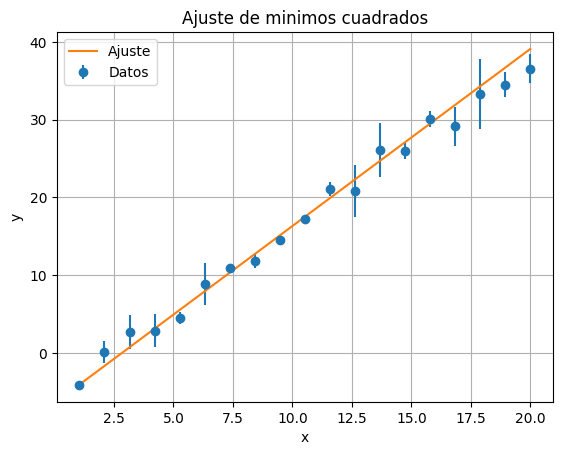

In [29]:
plt.errorbar(x,y,yerr=sigma,fmt='o', label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(t,modelo(t,param), label='Ajuste')
plt.title('Ajuste de minimos cuadrados')
plt.legend()
plt.grid()
print('f(x) = a0 + (a1)*x')
print('a0 = {}'.format(param[0]))
print('a1 = {}'.format(param[1]))